<a href="https://colab.research.google.com/github/kieunseo/Regression/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 생존자 예측



In [ ]:
import pandas as pd #효과적인 데이터 분석을 위한 높은 수준의 자료구조와 데이터 분석기능을 제공
import numpy as np #다차원 배열을 쉽게 처리할 수 있도록 지원
import matplotlib.pyplot as plt #데이터 시각화와 2D 그래프 플롯에 사용
import seaborn as sns

#데이터 불러오기

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/titanic 2/train.csv') #train 불러오기
df_test = pd.read_csv('/content/drive/MyDrive/titanic 2/test.csv') #test 불러오기
#구글 드라이브 경로복사

In [ ]:
df_train.head(10)

In [ ]:
df_test.head(10)

In [ ]:
df_train.info() #데이터 개수, null 값, Data Type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


survived	0이면 사망, 1이면 생존

Pclass	티켓 등급 : 1, 2, 3

Name	승객 이름 : 성, 호칭. 이름
Surname, Title. Firstname

Sex	성별 : male, female

Age	승객의 나이

SibSp	형제, 자매, 배우자의 합

Parch	부모, 자식의 합

Ticket	티켓 번호

Fare	요금

Cabin	객실 번호

Embarked	선착장 : C(Cherbourg), Q(Queenstown), S(Southampton)

In [ ]:
df_train['Survived'].value_counts() #고유한 값 발생 횟수 세기

Survived
0    549
1    342
Name: count, dtype: int64

#데이터 시각화

내가 찾고자 하는 값의 데이터 불균형 확인

In [ ]:
plt.figure(figsize=(10,5)) #가로 10, 세로 5inch의 백지 생성
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: ylabel='count'>

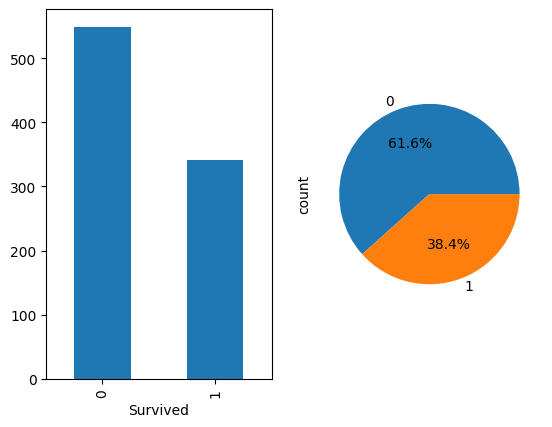

In [ ]:
plt.subplot(1,2,1)
#첫 번째 인자는 그림의 행(row) 수 가로 1개
#두 번째 인자는 그림의 열(column) 수 열 2개
#세 번째 인자는 서브플롯의 인덱스
#백지를 1행 2열 공간으로 나누고 첫번째 자리에 그래프에 그려줌

df_train['Survived'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)
df_train['Survived'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
#pie 그래프
#autopct 백분율을 표시하기 위한 옵션


<Axes: ylabel='count'>

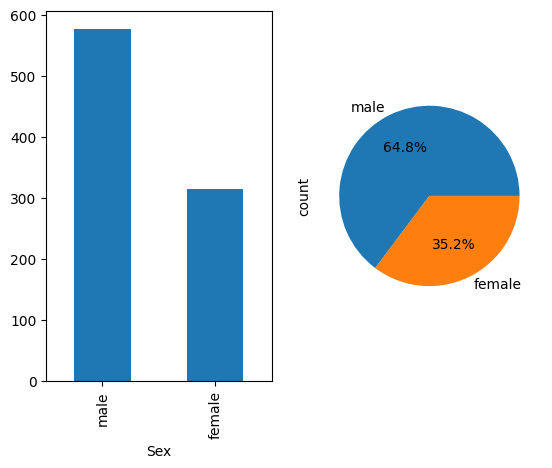

In [ ]:
plt.subplot(1,2,1) #1개의 2개의 그래프 그림, 그중에서 첫번째
df_train['Sex'].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
df_train['Sex'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

<Axes: xlabel='Sex'>

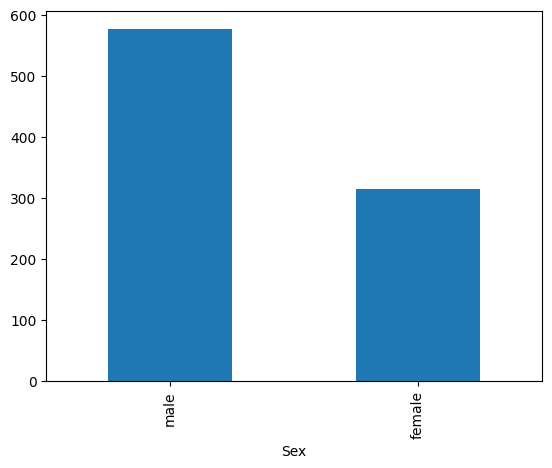

In [ ]:
df_train['Sex'].value_counts().plot(kind = 'bar')

Countplot: 항목별 갯수를 세어주는 countplot 입니다.

알아서 해당 column을 구성하고 있는 value들을 구분하여 보여줍니다.




<Axes: xlabel='Sex', ylabel='count'>

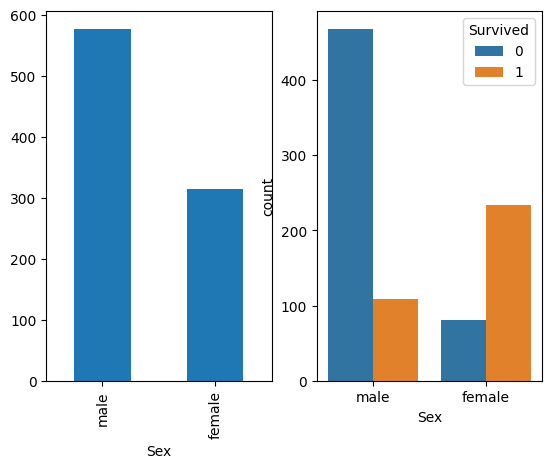

In [ ]:
plt.subplot(1,2,1)
df_train['Sex'].value_counts().plot(kind = 'bar')


plt.subplot(1,2,2)
sns.countplot(data = df_train, x = "Sex", hue = "Survived")

<Axes: xlabel='SibSp'>

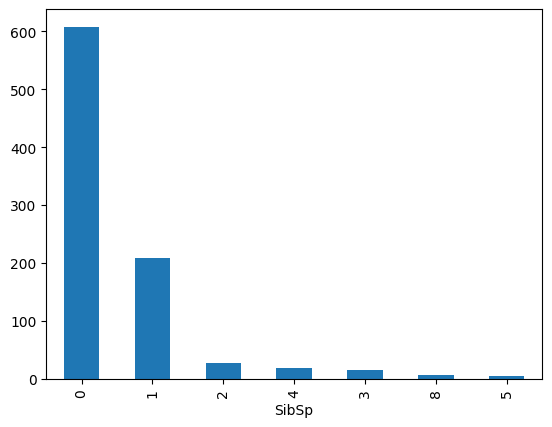

In [ ]:
df_train["SibSp"].value_counts().plot(kind = "bar")

<Axes: xlabel='Age'>

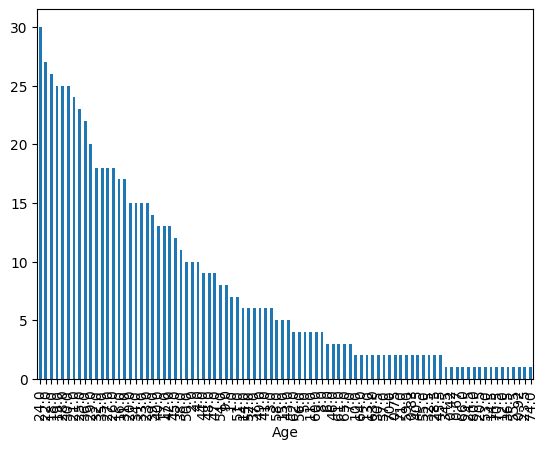

In [ ]:
df_train["Age"].value_counts().plot(kind = 'bar')
#시각적으로 좋지 않음

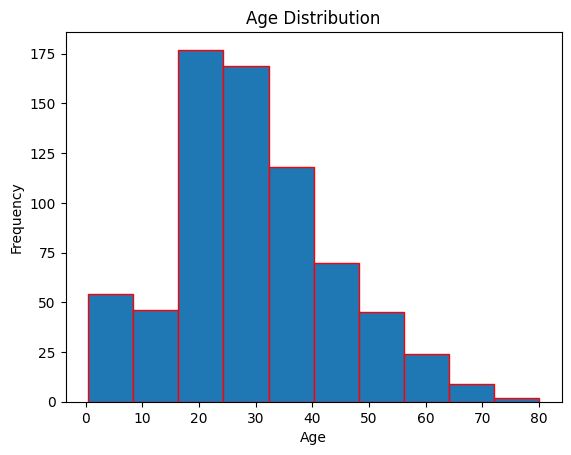

In [ ]:
plt.hist(df_train["Age"], bins=10, edgecolor='red')
# bins -> 막대 갯수
# edgecolor -> 막대 테두리
#연령을 20개의 구간으로 나누어 히스토그램을 그림

plt.xlabel('Age')  # x축 레이블 설정
plt.ylabel('Frequency')  # y축 레이블 설정
#각 구간에 속하는 데이터의 빈도수를 나타냄. 각 막대의 높이가 데이터 개수

plt.title('Age Distribution')  # 그래프 제목 설정
plt.show()

#gpt를 활용한 히스토그램 만들기

<Axes: xlabel='Embarked', ylabel='count'>

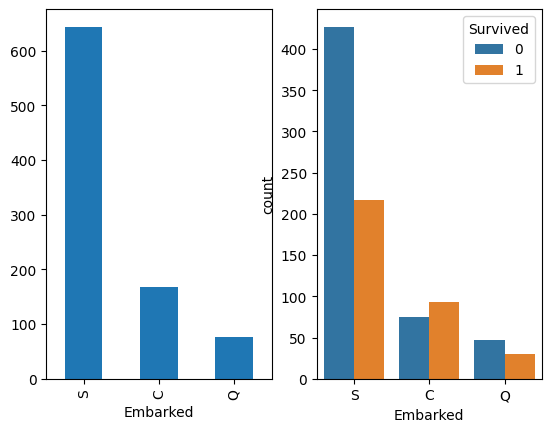

In [ ]:
plt.subplot(1,2,1)
df_train["Embarked"].value_counts().plot(kind = 'bar')

plt.subplot(1,2,2)
sns.countplot ( data = df_train, x = "Embarked", hue = "Survived")

<Axes: xlabel='Parch'>

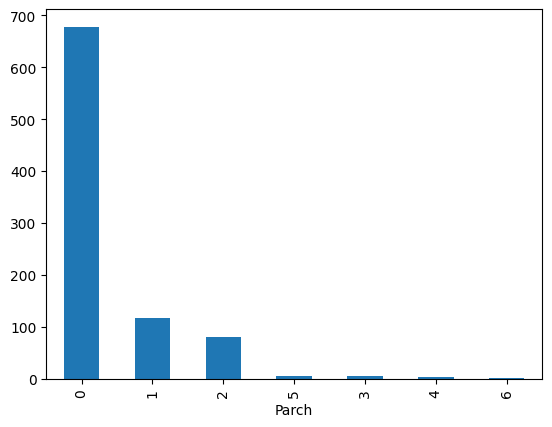

In [ ]:
df_train['Parch'].value_counts().plot(kind = "bar")

survived	0이면 사망, 1이면 생존

Pclass	티켓 등급 : 1, 2, 3

Name	승객 이름 : 성, 호칭. 이름
Surname, Title. Firstname

Sex	성별 : male, female

Age	승객의 나이

SibSp	형제, 자매, 배우자의 합

Parch	부모, 자식의 합

Ticket	티켓 번호

Fare	요금

Cabin	객실 번호

Embarked	선착장 : C(Cherbourg), Q(Queenstown), S(Southampton)

#결측치 확인하기

In [ ]:
df_train.isnull()
# null이면 True, not-null이면 False

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked -> 결측치가 있음

##Age 결측치 확인

<Axes: ylabel='Frequency'>

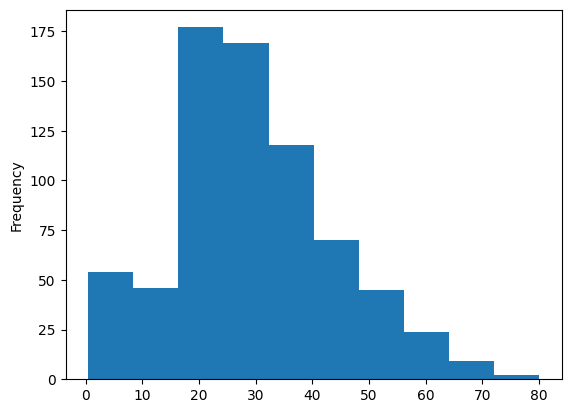

In [ ]:
df_train['Age'].plot(kind = 'hist')
#hist 히스토그램을 그리라는 지시

In [ ]:
age_before = df_train[df_train['Age'].isnull()]
age_before.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [ ]:
mean_age = df_train['Age'].mean()
print(mean_age)

29.69911764705882


In [ ]:
df_train['Age'] = df_train['Age'].fillna(mean_age)
df_train[df_train.index.isin(age_before.index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,NaN,S


In [ ]:
df_train['Age'].isnull().sum()

0

<Axes: ylabel='Frequency'>

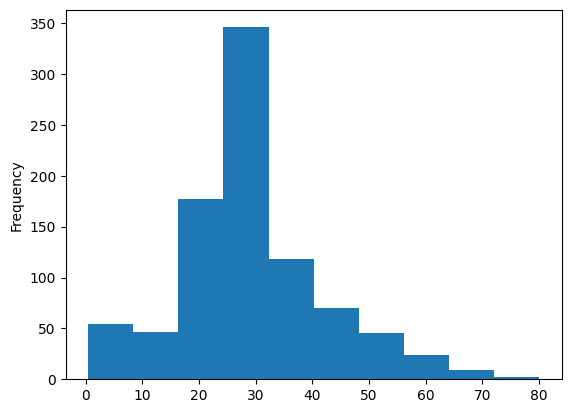

In [ ]:
df_train['Age'].plot(kind = 'hist')

히스토그램은 주어진 변수의 값들을 구간으로 나누고, 각 구간에 속하는 데이터의 빈도를 막대로 나타내기 때문에 데이터의 분포를 직접 확인할 수 있다. 따라서, value_counts()를 사용하여 빈도를 먼저 확인하는 것은 히스토그램을 그릴 때 중복된 정보를 제공하는 것이 되므로 굳이 사용하지 않음

<Axes: xlabel='Embarked'>

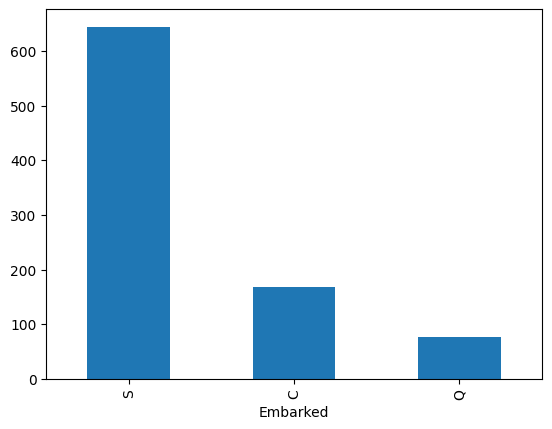

In [ ]:
df_train["Embarked"].value_counts().plot(kind = "bar")

##Embarked 결측치 처리

In [ ]:
em_befor = df_train[df_train['Embarked'].isnull()]
em_befor.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df_train[['Embarked']].mode()

,Embarked
0,S


mode() 함수는 주어진 데이터프레임 또는 시리즈에서 가장 빈번하게 나타나는 값을 찾아줍니다. 즉, 최빈값을 반환합니다.

In [ ]:
#최빈값 ('S')로 대체
mode_em = df_train['Embarked'].mode
df_train['Embarked'] = df_train['Embarked'].fillna('S')

df_train[df_train.index.isin(em_befor.index)]
#결측치였던 인덱스를 가져와서 결측값을 최빈값으로 바꿨다는 것을 알려줌

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [ ]:
df_train['FamilySize'] = (df_train['SibSp'] + df_train['Parch'] +1)
#SibSp (형제 자매 / 배우자의 수) Parch (부모 / 자녀의 수)

In [ ]:
df_train['Alone'] = 0

In [ ]:
df_train.loc[df_train['FamilySize'] == 1, 'Alone'] = 1
# FamilySize가 1인 승객들은 Alone 값을 1로 변경, 혼자온 사람

파라미터는 함수의 입력을 정의하는 '매개변수'

아규먼트는 함수 호출 시 전달되는 값

행, 열에 접근하기, 하나로 묶어줘야 함

- loc, 이름으로 접근

    → 행 이름이 0인 것

    loc[[1,10,100], [”year”, “열”]]

- iloc, 순서로 접근

    → 0번째 행에 접근하는 것

    iloc[[0,10,100], [0, 2]] 순서로 접근

dataframe.loc[행 레이블, 열 레이블]

파라미터 종류

행 레이블: 선택하고자 하는 행의 인덱스 레이블입니다. 단일 레이블, 레이블 리스트, 레이블 범위 슬라이스, 또는 불리언 배열을 사용할 수 있습니다.

열 레이블: 선택하고자 하는 열의 이름입니다. 단일 이름, 이름의 리스트, 또는 이름 범위 슬라이스를 사용할 수 있습니다.

dataframe.iloc[행 위치, 열 위치]

파라미터 종류

행 위치: 선택하고자 하는 행의 정수 인덱스입니다. 단일 인덱스, 인덱스 리스트, 인덱스 범위 슬라이스를 사용할 수 있습니다.

열 위치: 선택하고자 하는 열의 정수 인덱스입니다. 단일 인덱스, 인덱스 리스트, 인덱스 범위 슬라이스를 사용할 수 있습니다.

loc[]는 레이블을 기준으로 하므로, 지정된 레이블이 DataFrame에 없으면 오류 발생

iloc[]는 정수 위치를 기준으로 하므로, 지정된 인덱스가 DataFrame의 범위를 벗어나면 오류가 발생

# Feature Engineering - 명목변수 인코딩(One hot Encoding)


In [ ]:
x1 = pd.get_dummies(df_train['Pclass'])
x2 = pd.get_dummies(df_train['Sex'])
x3 = pd.get_dummies(df_train['Embarked'])

data = pd.concat([df_train, x1, x2, x3], axis=1)
x3.head(3)

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True


In [ ]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,2,0,False,False,True,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,2,0,True,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,False,False,True,True,False,False,False,True


# Feature Selection - 변수 선택 및 제외


axis: 0은 행을, 1은 열을 의미

In [ ]:
drop_cols = ['PassengerId','Name',"Ticket",'Cabin','Survived','Pclass','Sex', 'Embarked']
X = data.drop(drop_cols, axis = 1)
y = data['Survived']
X.head(3)

,Age,SibSp,Parch,Fare,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.2500,2,0,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,2,0,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,1,1,False,False,True,True,False,False,False,True


In [ ]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

# 분류모델정의 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 500)
#max_iter 모델을 훈련시키는 최적의 알고리즘의 최대 반복 횟수 지정

#Cross Validation - 교차검증

In [ ]:
X.columns = X.columns.astype(str)
type(X.columns)

pandas.core.indexes.base.Index

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv = cross_val_score(lr, X, y, cv = 5, error_score='raise')
print(cv)

[0.78212291 0.79213483 0.79775281 0.78089888 0.83146067]


# Train, Test data split - 학습, 테스트 데이터 분리


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#0.3은 데이터의 30%가 테스트용으로 사용되고 나머지 70%는 훈련용으로 사용

#분할의 무작위성을 제어하는 숫자나 RandomState 인스턴스
#random_state=42는 매번 실행할 때마다
#동일한 방식으로 데이터를 분할하도록 보장

In [ ]:
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:',y_test.shape)

X_train.shape: (623, 14)
y_train.shape: (623,)
X_test.shape: (268, 14)
y_test.shape: (268,)


shape 속성을 사용하여 배열의 차원과 각 차원의 길이를 튜플로 반환

random_state 코드를 여러 번 실행하더라도 동일한 결과를 얻기 위해 사용

# Model Train - 모델 학습


In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

# Model Evaluation - 모델 평가


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
print('정확도:', accuracy_score(y_test, y_pred))

정확도: 0.8097014925373134


accuracy_score 함수는 Scikit-learn 라이브러리의 metrics 모듈에 포함되어 있는 함수로, 분류 모델의 예측 정확도를 측정하는 데 사용

이 함수는 실제 타겟 값과 모델에 의해 예측된 타겟 값 사이의 정확도를 계산

In [ ]:
y_pred # 승선객들에 대한 생존여부 예측 [0: 사망, 1: 생존]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

# Other Models - DecisionTree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() # 모델 인스턴스 생성
dt.fit(X_train, y_train) # 훈련 데이터를 사용하여 모델 훈련
y_pred = dt.predict(X_test) # 테스트 데이터를 사용하여 예측 수행
print('정확도:', accuracy_score(y_test, y_pred))

정확도: 0.7425373134328358


#Other Models - RandomForest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('정확도:', accuracy_score(y_test, y_pred))

정확도: 0.7798507462686567


#Predict - 생존여부 예측

In [ ]:
X.head(1)

,Age,SibSp,Parch,Fare,FamilySize,Alone,1,2,3,female,male,C,Q,S
0,22.0,1,0,7.25,2,0,False,False,True,False,True,False,False,True


my data 생성

Age:23 SibSp: 1 Parch: 2 Fare: 100 FamilySize: 4 Alone: 0

Pclass: 2(0,1,0) Sex: male(0,1) Emb: C(1,0,0)

In [ ]:
da = [[15, 1, 2, 100, 4, 0, 0, 1, 0, 0, 1, 1, 0, 0]]
pred = lr.predict(da)


if pred:
    print('생존!')

else:
    print('사망')

생존!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
